# 이상 탐지(Anomaly detection) 

1. [이상탐지란?](#이상탐지란?)
    - [이상의 종류](#이상의-종류)
    - [이상탐지 사례](#이상탐지-사례)
1. [비지도 학습: 이상탐지 알고리즘](#비지도-학습:-이상탐지-알고리즘)
    - [1. Local Outlier Factor (LOF)](#1.-Local-Outlier-Factor-(LOF))
    - [2. Isolation Forest](#2.-Isolation-Forest)
1. [실습: IsolationForest 로 급여 데이터세트의 이상치 탐색](#실습:-IsolationForest-로-급여-데이터세트의-상치-탐색)
1. [참고](#참고)

# 이상탐지란?

이상 탐지(anomaly detection)란 자료에서 다른 패턴을 보이는 자료를 찾는 것을 말합니다. 이런 데이터를 이상값(anomaly)라 하며 이상 탐지는 사기 탐지, 침입 탐지, 안전 관리를 포함한 다양한 분야에 널리 활용된다.

#### 이상의 종류

- 2.1. Point anomaly
데이터셋 내에 하나의 데이터가 나머지에 대해 이상하다고 판단되는 경우, 흔히 아웃라이어(Outlier)라고 부른다.

- 2.2. Collective anomaly
데이터셋 내에 여러 데이터 포인트가 이상하다고 판단되는 경우

- 2.3. Contextual anomaly
전체적인 데이터셋의 맥락을 고려했을때 이상하다고 판단되는 경우


#### 이상탐지 사례

예시는 “[Deep Learning for Anomaly Detection: A Survey, 2019 arXiv](https://arxiv.org/abs/1901.03407) 2019년에 작성된 서베이 논문을 참고하여 작성하였다.

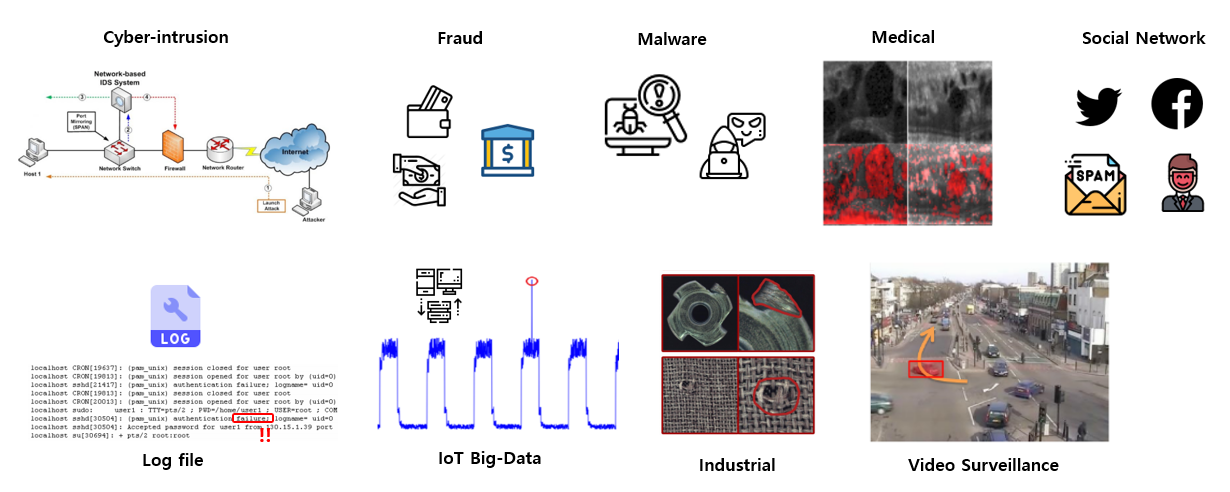
 - 이상탐지 적용 사례, https://www.cognex.com/ko-kr/blogs/deep-learning/research/anomaly-detection-overview-1-introduction-anomaly-detection


이상치는 정상치에 비해 매우 다른 특징을 가진 데이터를 의미합니다. 
 - 통계적으로 평균과 표준편차를 구해서, 이와 크게 벗어나는 값을 이상치로 취급
 - 다차원 데이터를 취급할 때는 군집 기반의 방법론을 주로 사용. 


# 비지도 학습: 이상탐지 알고리즘

1. Mahalanobis 거리를 통해 outlier 색출
1. K-Means를 통한 군집화
1. DBSCAN
1. Isolation Forest
1. Local Outlier Factor (LOF)
1. OneClassSVM


## 1. Local Outlier Factor (LOF)

원논문 : https://dl.acm.org/citation.cfm?id=335388

LOF는 대표적인 군집 기반의 방법으로 데이터들간의 특성에 따라, 어떤 집단(혹은 군집)에선 매우 가까운 거리가, 어떤 집단에선 매우 먼 거리일 수 있다는 것이다.

> 예를 들어 "거리가 c 이하인 window 내에 들어오는 데이터가 k개 이상인가?" 로 dense를 지정하는 Density based method는 density가 상이한 클러스터들이 있을때 문제가 발생한다. 

아래 같이 집단 C1과 집단 C2의 density가 다르기에, o1은 걸러내기 쉽지만 o2는 걸러내기가 어렵다

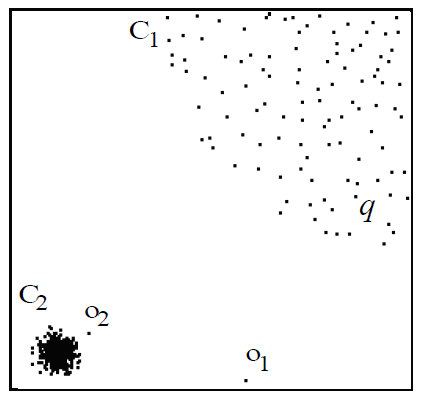

> https://godongyoung.github.io/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2019/03/11/Local-Outlier-Factor(LOF).html
> https://jayhey.github.io/novelty%20detection/2017/11/10/Novelty_detection_LOF/

이러한 문제의식에서, local의 상대적인 dense를 비교하여 outlier를 정하자는 lof가 나왔다. 큰 틀은, neighbor들의 dense를 고려하여 비교한다는 것이다. 

이러한 기존 방법론의 가장 큰 문제는 1) 정상치를 모두 고려해야 하므로 계산 부하가 크다는 점, 2) 매번 정상치를 프로파일링해서 이상치를 계산하므로 모델을 생성하고 재활용하기 어렵다는 점이다. 다음의 Isolation Forest 기계학습 알고리즘은 기존 방법론과 다르게, 이상치 기준을 모델로 생성하는 방법론을 제시합니다.

## 2. Isolation Forest

Isolation Forest 알고리즘은 군집 내부의 정상치를 고립(분류)하려면 많은 횟수의 공간분할을 해야 하지만 오르쪽 같이 군집에서 먼거리 이상치는 적은 횟수의 공간분할만으로 고립할 수 있다.

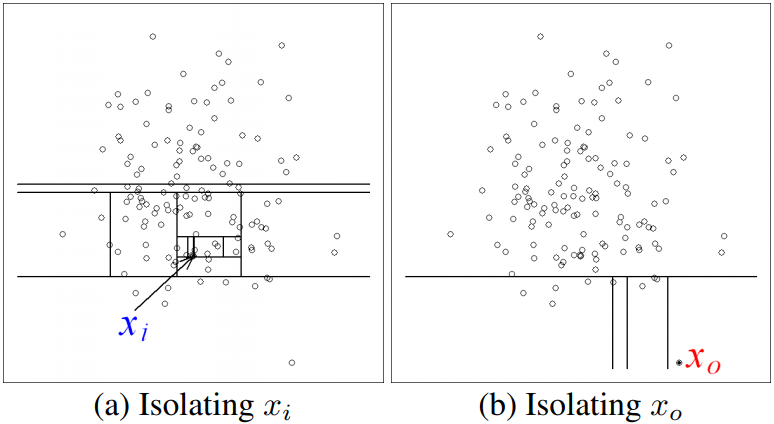



> Isolation Forest 참고:
>
> - https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf
> - https://ko.logpresso.com/documents/anomaly-detection

### - 공간분할을 위한 의사결정나무 알고리즘

Isolation forest 는 기본적으로 데이터셋을 의사결정나무 형태로 표현할 때 랜덤하게 칼럼을 선택하고, 선택된 칼럼의 최대값과 최소값을 분리하는 값을 랜덤으로 선택하는 방법을 사용한다. 

**1) 정상값** 을 분리하기 위해서는 의사결정나무를 깊숙하게 타고 내려가야 하고, 반대로 **2) 이상값**은 의사결정나무 상단부에서 분리할 수 있다는 것을 이용한다. 

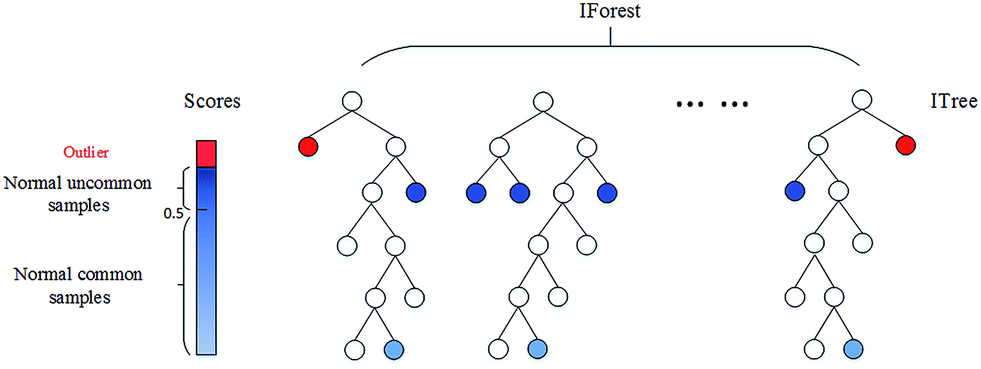


#### - 의사결정트리 정확성

이상탐지 분야에서 해결하기 어려운 문제는 Swamping과 Masking이라 불리는 현상입니다. Swamping은 정상치가 이상치에 가까운 경우 이상치로 잘못 분류하게 되는 현상이고, Masking은 이상치가 군집화되어 있으면 정상치로 잘못 분류하게 되는 현상입니다.

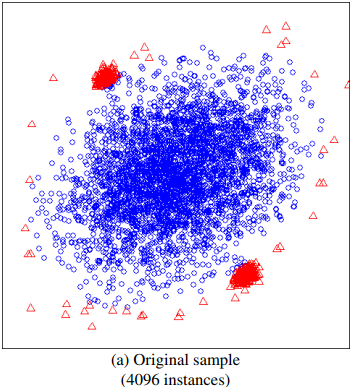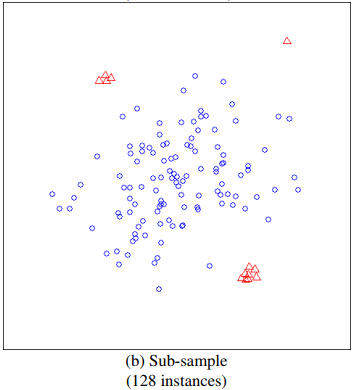
 - https://ko.logpresso.com/documents/anomaly-detection

Isolation Forest는 전수 데이터를 이용하지 않고 일부 데이터만 샘플링해서 모델을 생성하기 때문에, 상대적으로 이런 오류에 강건한 특성을 가지게 됩니다. 


#### [Isolation forest의 특징]

- 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적다
- 강건한(Robust)한 모델을 만들 수 있다
- Sub-sampling : 전수 데이터가 아닌 sampling한 데이터로 모델을 생성 (군집화 이상탐지 방식은 전수데이터를 사용해야 함)
- Swamping : 이상치가 정상치와 가까이 위치된 경우 잘못 분류하게 되는 현상  → 이를 해결하기 위한 해결책은 sub sampling 포인트를 줄이는 것 
- Masking : 이상치가 군집화되어 있어 정상치로 잘못 분류하게 되는 현상 → sub sampling으로 해결 가능
- High Dimensional Data : 고차원의 데이터 (feature 가 매우 많은 경우)에서 잘 작동하지 않을 수 있음. 이유는 고차원의 데이터로 넘어갈때 데이터간 sparse한 space가 많이 늘어나기 때문에 split 을 제대로 못할 것임. → 차원을 줄이는 방법 (상관관계, 첨도 확인 등)
- Normal Instances Only : train 데이터에 이상치가 포함되지 않아도 iForest는 잘 작동함. 이유는 score 판정 자체가 path length인 h(x)로 산정하기 때문 → 즉, iForest의 성능에는 이상치가 학습데이터에 있는지 없는지는 중요하지 않음



### - 실습: 이상치 샘플 데이터 세트

간단한 학습, 훈련 및 이상치 데이터를 생성해서 IsolationForest 로 학습을 진행해 본다.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

임의의 분포 데이터 생성

In [2]:
rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

In [3]:
X_train.shape, X_test.shape, X_outliers.shape

((2000, 2), (400, 2), (50, 2))

생성한 데이터셋을 시각화해 살펴본다.


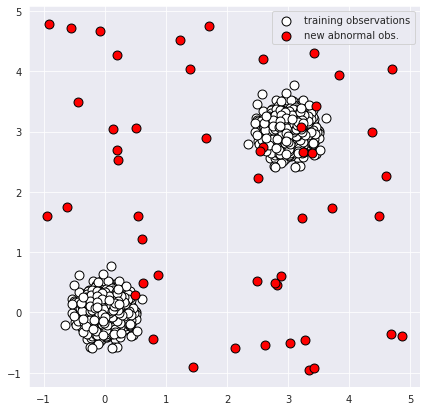

In [6]:
plt.figure(figsize=(7,7))
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=20*4, edgecolor='k', label='training observations')
# p2 = plt.scatter(X_test.x1, X_test.x2, c='green', s=20*4, edgecolor='k', label='new regular obs.')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red', s=20*4, edgecolor='k', label='new abnormal obs.')

plt.legend()

scikit-learn의 IsolationForest 함수를 이용해 학습 모델을 만든다.


In [7]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

학습된 모델을 가지고 X_outliers 데이터셋의 이상 탐지한다


In [8]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [9]:
# 피처의 예측 결과 y에 예측치 대입
X_outliers = X_outliers.assign(y = y_pred_outliers)
# X_outliers['y'] = y_pred_outliers

X_train.shape, X_test.shape, X_outliers.shape

((2000, 2), (400, 2), (50, 3))

In [10]:
# 여기서 이상 징후 및 정상 지점의 수를 찾습니다. -1은 비정상입니다.
X_outliers['y'].value_counts()

-1    48
 1     2
Name: y, dtype: int64

시각화를 통해 나타낸다.

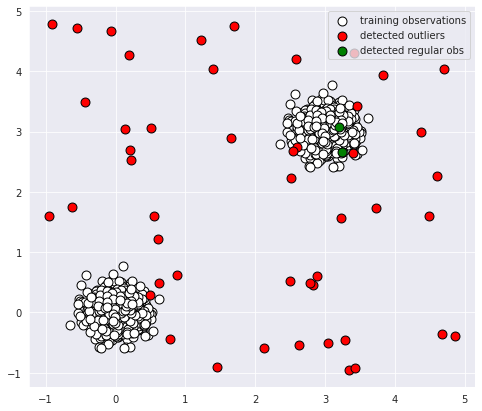

In [12]:
plt.figure(figsize=(8,7))
p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k', label="training observations")
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k', label="detected outliers")
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k', label="detected regular obs")
plt.legend()

시각화된 결과를 보면 이상치 48곳이 붉은색, 그리고 2곳이 경계선에 있음을 알 수 있다.


In [13]:
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.925
이상치 데이터셋에서 정확도: 0.96


---

# 실습: IsolationForest 로 급여 데이터세트의 이상치 탐색

- https://www.kaggle.com/kaggle/sf-salaries
- https://notebook.community/luizhsda10/Data-Science-Projectcs/Pandas/SF%20Salaries%20Exercise

kaggle 샌프란시크코 공공 급여 : data_1110.zip

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

from sklearn.ensemble import IsolationForest


In [38]:
salary = pd.read_csv('Salaries.csv')
# salary.tail()
df = salary[['JobTitle', 'TotalPay']].copy()
df.head(5)

,JobTitle,TotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),538909.28
2,CAPTAIN III (POLICE DEPARTMENT),335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373.19


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   JobTitle  148654 non-null  object 
 1   TotalPay  148654 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB


In [26]:
def is_number(n):
    """is_number(n) 함수
       - 주어진 n 값이 숫자 여부를 반환    
    """
    try:
        float(n)
        return True
    except ValueError:
        return False;
    else:
        return float(n).is_integer()

In [42]:
df = df[df['JobTitle'].isin(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Police Officer', 'Custodian',
       'Firefighter', 'Recreation Leader', 'Patient Care Assistant'])]
df.head(5)

,JobTitle,TotalPay
36199,Firefighter,290076.13
36221,Firefighter,267951.41
36238,Firefighter,259740.36
36270,Firefighter,245399.19
36272,Firefighter,246369.02


데이터셋의 첫번째 열에는 직업의 이름(JobTitle)이 두번째 열에는 연봉(TotalPay)가 달러화 기준으로 나와 있다. 이제 데이터셋에 존재하는 직업의 종류와 각각 몇명의 데이터가 있는지 출력한다.

In [43]:
df['JobTitle'].value_counts()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Custodian                       2418
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Police Officer                  1476
Name: JobTitle, dtype: int64

위 결과를 통해 총 9개의 직업이 많개는 9424명의 데이터에서 적게는 1945명의 데이터를 포함하고 있다는 것을 알 수 있다.

각 직업별로 박스플롯을 그려 평균 연봉이 어느정도 되는지 시각화해보자.



<AxesSubplot:xlabel='JobTitle', ylabel='TotalPay'>

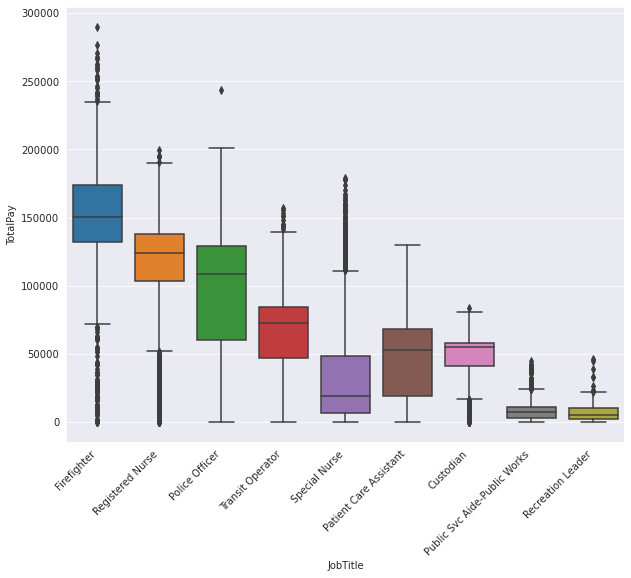

In [44]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45, horizontalalignment='right')

sns.boxplot(x='JobTitle', y='TotalPay', data=df)

위 시각화를 통해 미국에서는 소방관(Firefighter)의 연봉이 높다는 것과 연봉의 분포가 일정하지 않다는 것을 알 수 있다.

기계학습을 위해 위의 데이터를 LabelEncoder를 통해 전처리 해줘야한다.

In [45]:
from sklearn.preprocessing import LabelEncoder
job_encode = LabelEncoder()
df['JobTitle'] = job_encode.fit_transform(df['JobTitle'])
df.tail()

,JobTitle,TotalPay
148621,8,15.35
148625,6,6.00
148639,0,0.00
148648,0,0.00
148649,0,0.00


기계 학습모델을 만들어 학습을 수행한다.

In [46]:
model=IsolationForest(n_estimators=100, max_samples='auto', n_jobs=-1,
                      max_features=2, contamination=0.01)
model.fit(df.to_numpy())

IsolationForest(contamination=0.01, max_features=2, n_jobs=-1)

데이터프레임에 평가 점수(score)와 이상(anomaly) 판단 여부에 대한 값을 추가한다.


In [47]:
score = model.decision_function(df.to_numpy())
anomaly = model.predict(df.to_numpy())

df['scores']= score
df['anomaly']= anomaly

anomaly_data = df.loc[df['anomaly']==-1] # 이상값은 -1으로 나타낸다.
anomaly_data

,JobTitle,TotalPay,scores,anomaly
36199,1,290076.13,-0.081771,-1
36221,1,267951.41,-0.081771,-1
36238,1,259740.36,-0.081771,-1
36270,1,245399.19,-0.073012,-1
36272,1,246369.02,-0.074464,-1
...,...,...,...,...
148461,0,192.04,-0.001549,-1
148579,0,54.39,-0.001549,-1
148639,0,0.00,-0.002420,-1
148648,0,0.00,-0.002420,-1


총 31180개 데이터 중 312개의 데이터가 이상치로 판별된다. 이제 직업별로 이상치가 얼마나 되는지 살펴보자.

In [48]:
anomaly_data['JobTitle'].value_counts()

1    175
6     35
0     23
3     19
7     16
8      5
Name: JobTitle, dtype: int64

총 9개의 직업에서 5개 직업에 이상치가 발견되며, 소방관에서 가장 많이 분포한다. 이제 시각화를 통해 이상치가 어떻게 분포하는지 살펴보자.

<AxesSubplot:xlabel='JobTitle', ylabel='TotalPay'>

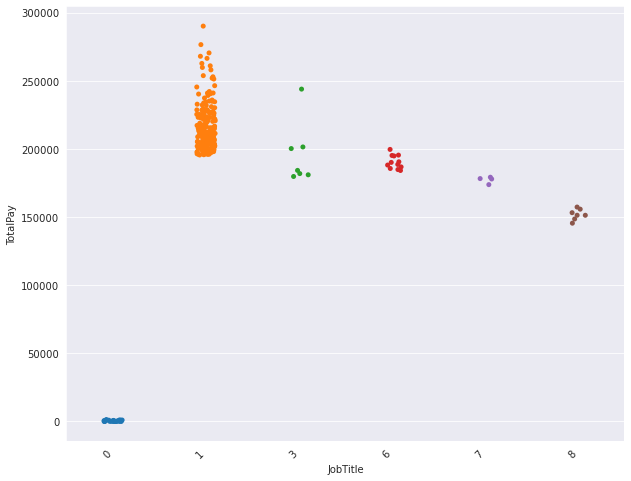

In [34]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45, horizontalalignment='right')
sns.stripplot(x='JobTitle', y='TotalPay', data=anomaly_data, jitter=True)

시각화를 해보면 소방관과 후견인(Custodian)에서 연봉이 유난히 낮은 사람들을 볼 수 있다. 후견인의 경우는 생업을 위한 직업이라고는 볼 수 없기 때문에 그런것으로 보여진다.


In [37]:
anomaly_data[
    (anomaly_data['JobTitle'] == 'Custodian')].sort_values(by=['TotalPay'], axis=0)

,JobTitle,TotalPay,scores,anomaly


In [36]:
anomaly_data[
    (anomaly_data['JobTitle'] == 'Custodian')&
    (anomaly_data['TotalPay'] <= 1000)].sort_values(by=['TotalPay'], axis=0)

,JobTitle,TotalPay,scores,anomaly


위 결과는 후견인들중 연봉이 1000달러 미만인 사람의 데이터를 정렬한 것이다. 연봉 1000달러도 사실 너무 낮지만 연봉을 받지 않는 사람들도 존재하고 있다. 이들의 데이터는 상식적으로 직업별 연봉 데이터셋에 불필요한 이상치라고 볼 수 있다.

5. 마치며,

이 글에서 이상이 무엇인지, 그리고 Isolation forest 알고리즘을 사용해 감지하는 방법을 배웠다. 박스 플롯을 사용해 데이터셋을 살펴보고 마지막으로 Isolation forest 알고리즘을 구현했다.

---

## 참고

 - [이상치 탐색이란](#https://datanetworkanalysis.github.io/2020/03/03/understanding_outlier2)


LOF 참고:
 - [Local Outlier Factor(LOF) 정리](https://godongyoung.github.io/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2019/03/11/Local-Outlier-Factor(LOF).html)


Isolation Forest 참고:
- https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf
- https://ko.logpresso.com/documents/anomaly-detection
- [사이버 공격에 의한 시스템 이상상태 탐지 기법, 2019, ADD](https://www.koreascience.or.kr/article/JAKO201931765047941.pdf)
- https://github.com/erykml/medium_articles/blob/master/Machine%20Learning/outlier_detection_hampel_filter.ipynb
- https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2


One-Class SVM :

- http://data.bit.uni-bonn.de/publications/ICML2018.pdf
- [의사결정나무를 이용한 1-SVM의 이상 탐지 규칙 도출](http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=11c5129b8ba8ead1ffe0bdc3ef48d419&outLink=K)


